In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("Unemployment in India.csv")

In [3]:
# Display the first 10 rows of the dataset
data.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [4]:
# Basic dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
# Check for missing values
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Region   Date   Frequency   Estimated Unemployment Rate (%)  \
0     False  False       False                             False   
1     False  False       False                             False   
2     False  False       False                             False   
3     False  False       False                             False   
4     False  False       False                             False   
..      ...    ...         ...                               ...   
763    True   True        True                              True   
764    True   True        True                              True   
765    True   True        True                              True   
766    True   True        True                              True   
767    True   True        True                              True   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0                  False                     

In [6]:
# Descriptive statistics of the dataset
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## Exploratory Data Analysis 

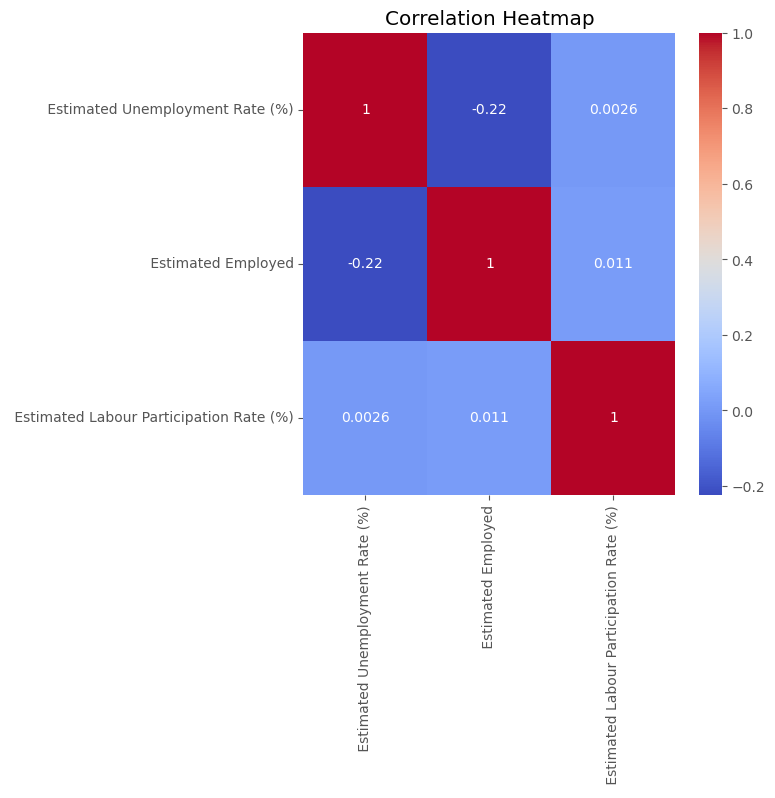

In [8]:
# Set plotting style

numeric_data = data.select_dtypes(include='number')

plt.style.use("ggplot")

plt.figure(figsize=(6, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

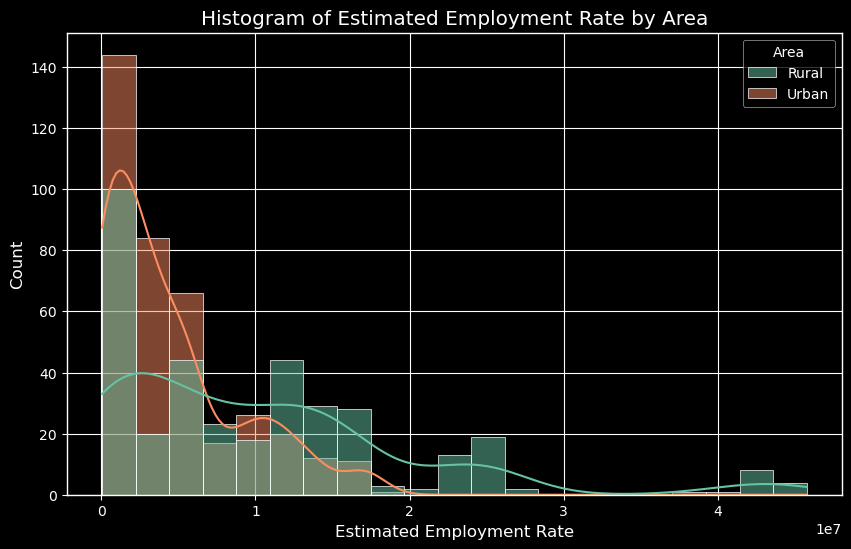

In [9]:
# Histogram of Estimated Employment Rate by Area

plt.style.use("dark_background")

data.columns = ["Region", "Date", "Frequency", "Estimated Unemp Rate", "Estimated Emp Rate", "Estimated Labour Rate", "Area"]

plt.figure(figsize=(10, 6))
sns.histplot(x="Estimated Emp Rate", hue="Area", data=data, kde=True, palette="Set2")
plt.title("Histogram of Estimated Employment Rate by Area")
plt.xlabel("Estimated Employment Rate")
plt.ylabel("Count")
plt.show()

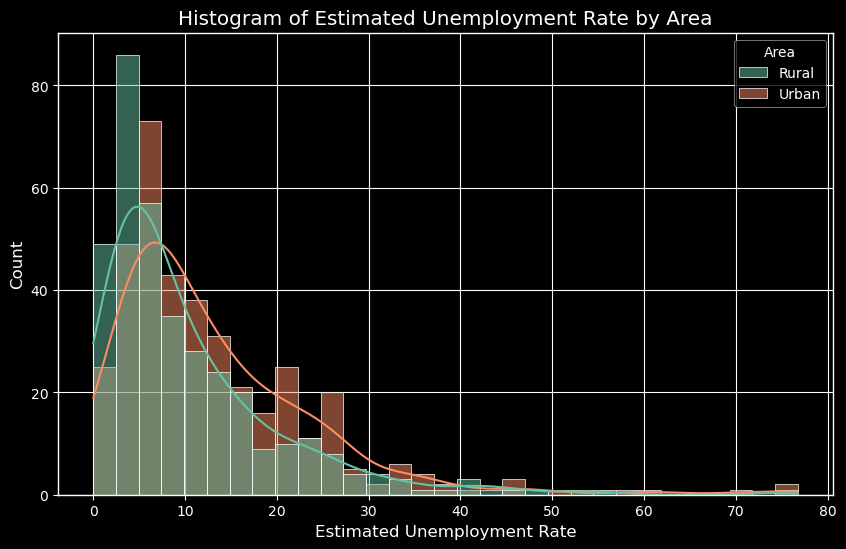

In [10]:
# Histogram of Estimated Unemployment Rate by Area

plt.style.use("dark_background")

data.columns = ["Region", "Date", "Frequency", "Estimated Unemp Rate", "Estimated Emp Rate", "Estimated Labour Rate", "Area"]

plt.figure(figsize=(10, 6))
sns.histplot(x="Estimated Unemp Rate", hue="Area", data=data, kde=True, palette="Set2")
plt.title("Histogram of Estimated Unemployment Rate by Area")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Count")
plt.show()

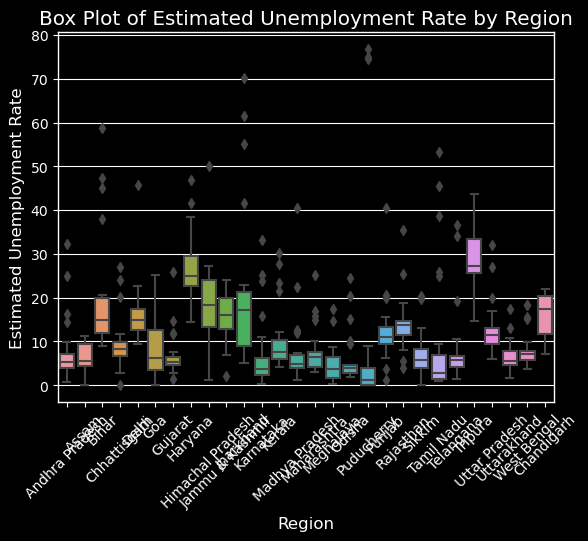

In [11]:
# BoxPlot of Estimated UnEmployement Rate by Region

import seaborn as sns

data = data[['Region', 'Estimated Unemp Rate']]
sns.boxplot(x='Region', y='Estimated Unemp Rate', data=data)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.show()

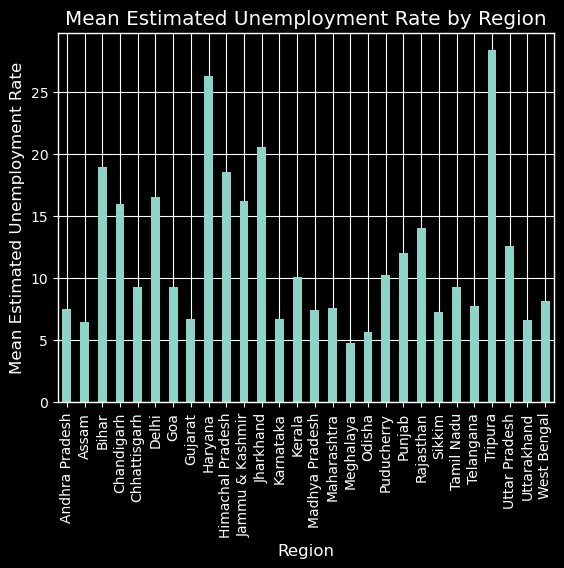

In [12]:
# Mean Estimated UnEmployement Rate by Region

import pandas as pd
import matplotlib.pyplot as plt


data = data[['Region', 'Estimated Unemp Rate']]
data_grouped = data.groupby('Region')['Estimated Unemp Rate'].mean()
data_grouped.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.title('Mean Estimated Unemployment Rate by Region')
plt.show()

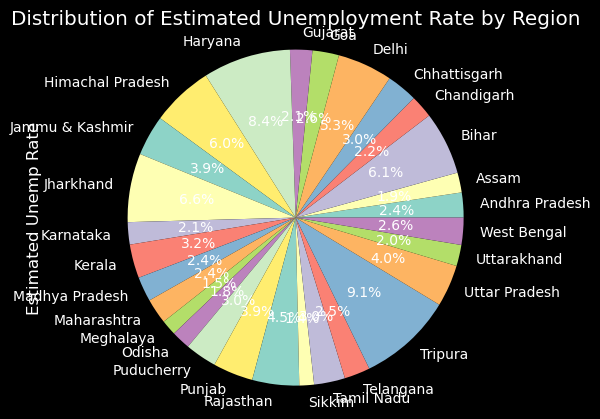

In [13]:
# Distribution of Estimated UnEmployement Rate by Region

data = data[['Region', 'Estimated Unemp Rate']]
data_grouped = data.groupby('Region')['Estimated Unemp Rate'].sum()
data_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()